## Παραδοτέο 1

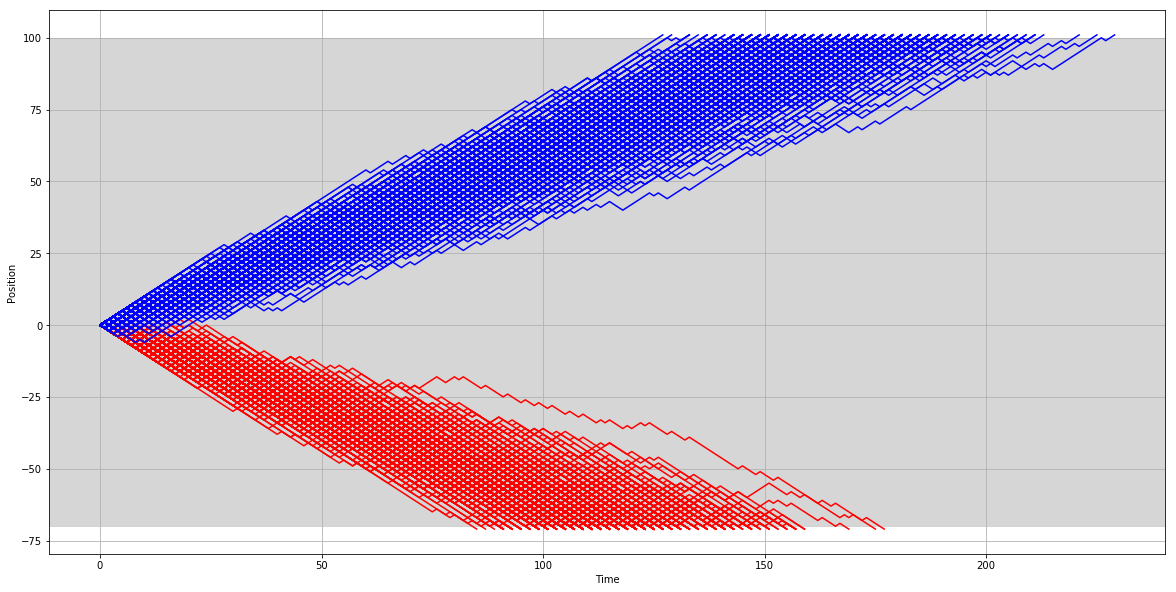

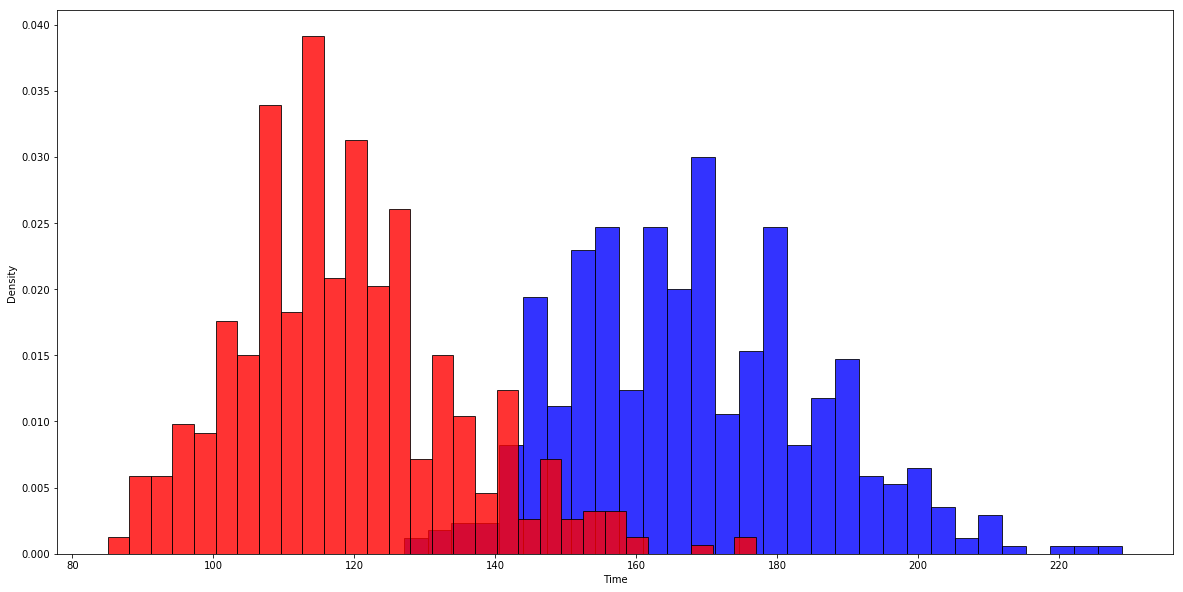

In [1]:
import numpy as np
import statistics as stat
from numpy.random import choice


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)  # default figure size

np.random.seed(2017)  # same results are previous run

# random walk generator:
def rand_walk_Z(start, probs):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        x += choice(steps, p=probs)
        yield x  # it's a generator!

fig, ax = plt.subplots()  # initiate plots

a = -70  # lower boundary
b = 100  # upper boundary

escape_time_1 = np.zeros(500, dtype=int)
escape_time_2 = np.zeros(500, dtype=int)

for col in ['red', 'blue']:      # 3 random walks r-ed, g-reen, b-lue
    for n in range(500):
        if col=='blue':
            probs= (1/5, 4/5)
        else:
            probs= (4/5, 1/5)
            
        walker = rand_walk_Z(0, probs)     # start new symmetric walk from 0
        x = 0                      # start position 0
        chain = [x]                # save positions to plot
        t = 0
        while a <= x <= b:
            x = next(walker)
            chain.append(x)
            t+=1
        if col=='blue':
            escape_time_1[n] = t
        else:
            escape_time_2[n] = t
        ax.plot(chain, color=col)

# To look nicer
plt.axhspan(a, b, color = '#cccccc', alpha = 0.8)  # box between a & b
ax.grid()  # adds grid lines
plt.xlabel('Time')
plt.ylabel('Position')

# Show image!
plt.show()


plt.hist(escape_time_1, bins=30, color='blue', edgecolor='black', normed=True, alpha=0.8)
plt.hist(escape_time_2, bins=30, color='red', edgecolor='black', normed=True, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()


Όπως φαίνεται από το πρώτο διάγραμμα, υπάρχει συμμετρία για τις δύο διαφορετικές 500-άδες διαδρομών. Κάτι τέτοιο ήταν αναμενόμενο, δεδομένου ότι οι πιθανότητες μεταβάσεων είναι "συμπληρωματικές" στις δύο περιπτώσεις. Όσο τμήμα των μπλε διαδρομών βρίσκεται πάνω από το 0 και επικαλύπτεται με τις κόκκινες διαδρομές, άλλο τόσο τμήμα των κόκκινων βρίσκεται κάτω από το 0 και επικαλύπτεται με τις μπλε (αυτό φαίνεται με χρήση της παραμέτρους alpha της matplotlib). 


Το ιστόγραμμα των χρόνων εξόδου δείχνει ότι υπάρχει επικάλυψη, αλλά γενικά στις κόκκινες διαδρομές υπάρχει μεγαλύτερη πυκνότητα. 

## Παραδοτέο 2

Παρακάτω παρατίθεται το ιστόγραμμα της θέσης $x_{100}$. 

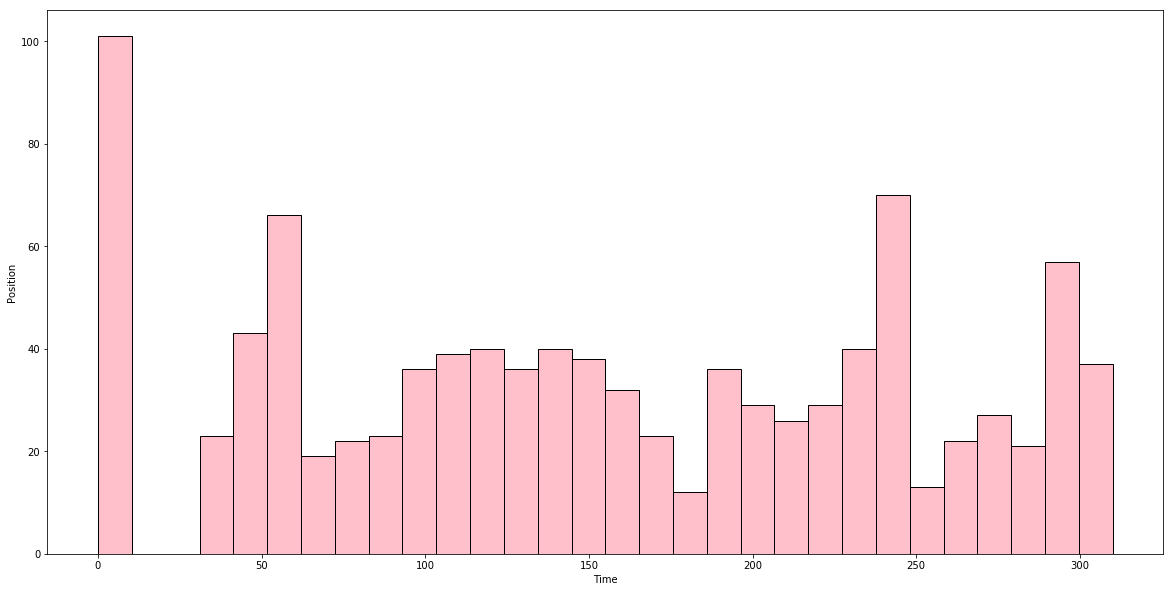

In [2]:
def rand_walk_Zplus(start=0, probs=(1/3, 2/3)):
    # probs order (left, right, bottom, up)
    x = start
    steps = [-1, 1]
    while True:
        if x==0:
            steps = [1,0]
        else:
            steps = [-1,1]
        
        x += choice(steps, p=probs)
        yield x  # it's a generator!
            
walker = rand_walk_Zplus()  # start a new markov chain
t = 0
position = np.zeros(1000, dtype=int)  # to store the exit time

max_x = 0
estimates = np.zeros(1000, dtype=int)  # to store the exit time


for n in range(1000):
    x = next(walker)  # take 1 step!
    if x>max_x:
        max_x = x
    estimates[n] = max_x
    if n>100:
        position[n] = x

        
plt.hist(position, bins=30, color='pink', edgecolor='black', normed=False) # changed normed value so as to present actual position in chain
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()


Παρακάτω φαίνεται το ιστόγραμμα της κατανομής της $M_{1000}$ συναρτήσει του $k$, καθώς και η μέση τιμή και η διασπορά.   

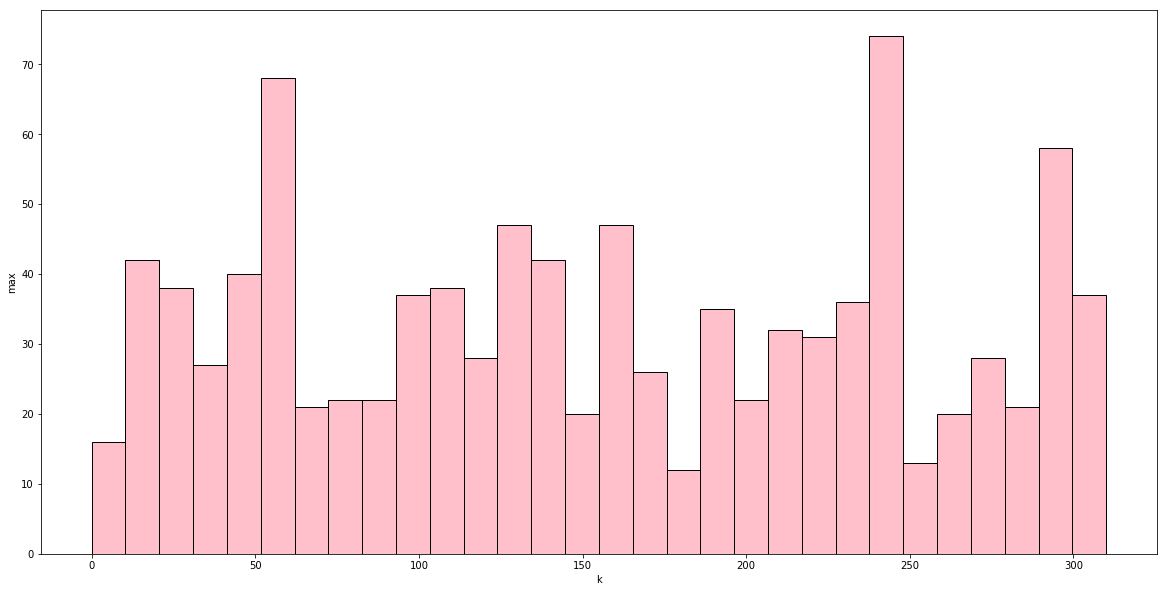

In [3]:
plt.hist(estimates, bins=30, color='pink', edgecolor='black', normed=False)
plt.xlabel('k')
plt.ylabel('max')
plt.show()

In [4]:
print(
    """ 
    The sample mean is {0} and the sample variance is {1}
    """.format(stat.mean(estimates), stat.variance(estimates))
)

 
    The sample mean is 155 and the sample variance is 8196
    


## Παραδοτέο 3

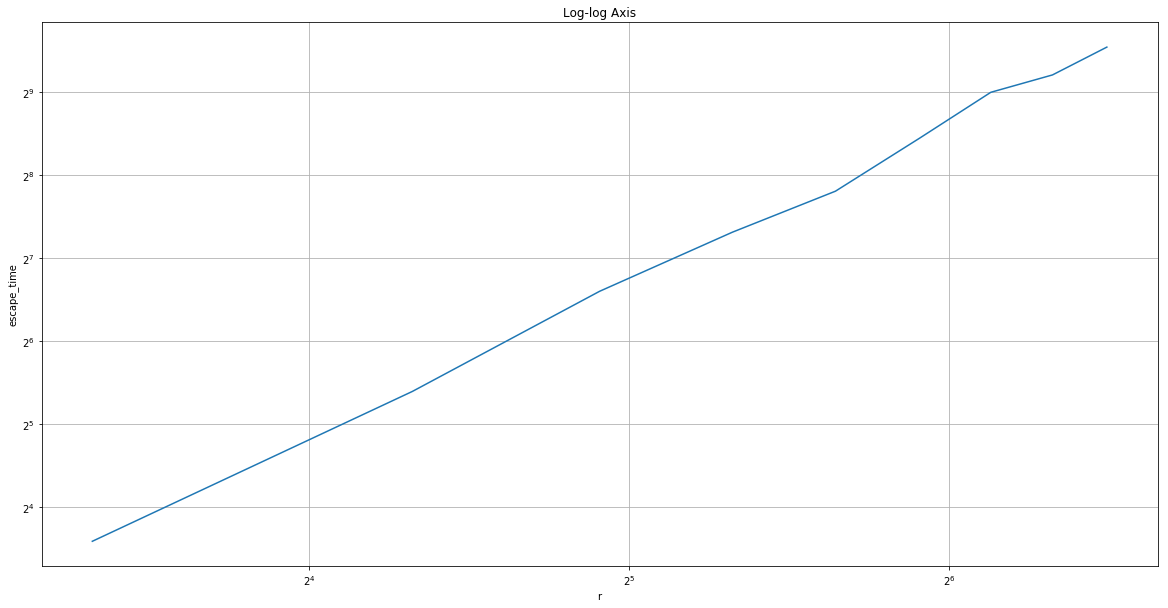

In [5]:
# random walk in Z^2 generator:
def rand_walk_Z2(start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    # probs order (left, right, bottom, up)
    x, y = start
    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    while True:
        dx, dy = steps[choice(4, p=probs)]  # choice(4) = choose a number in [0,3]
        x, y = x + dx, y + dy
        yield x, y
        

fig, ax = plt.subplots()  # initiate plots

escapes = []  # to store the exit time

for r in range(10,100,10):
    escape_time = np.zeros(500, dtype=int)  # to store the exit time
    r2 = r**2  # square of radius
    
    for n in range(50):
        walker = rand_walk_Z2()
        x, y = (0, 0)
        t = 0
        while x**2 + y**2 < r2:
            x, y = next(walker)
            t += 1
        escape_time[n] = t
    
    esc = stat.mean(escape_time)
    escapes.append(esc)
    
x  = np.arange(10,100,10)

plt.loglog(x, escapes, basex=2, basey=2)
plt.xlabel('r')
plt.ylabel('escape_time')
plt.title('Log-log Axis')
plt.grid(True)


Εδώ τα αποτελέσματα φαίνονται για 50 samples, διότι συνέκλιναν ταχύτερα. Ομοίως μπορεί να δειχθεί αλλάζοντας το n σε range 500, απλά αργεί να ξεφύγει η αλυσίδα. Η σχέση σε λογαριθμική κλίμακα είναι σχεδόν γραμμική, με μια μικρή απόκλιση. Αυτό σημαίνει ότι όσο αυξάνει η ακτίνα, ο χρόνος που κάνει να ξεφύγει από το δίσκο αυξάνεται, που είναι και λογικό να αυξάνει ο χρόνος εξόδου με σχεδόν ανάλογο τρόπο.  